#**Hito 1: Proyecto Minería de Datos - Tweets Coronavirus**


**Integrantes:** Pablo Apablaza, Pía Contreras, Luca Leporati, Daniel Maniega, Matías Osses.


##**Introducción - Descripción del problema**

La pandemia causada por el COVID-19 ha impactado de forma repentina y con gran fuerza a las personas de todo el mundo, no solamente por la cantidad de enfermos y muertes, sino también por la forma en que ha cambiado repentinamente el desarrollo de las relaciones humanas. Por el momento, la única medida efectiva existente para paliar los efectos de la monumental crisis en el sistema sanitario, es el distanciamiento social, lo que ha hecho que autoridades de todos los países tomen medidas de aislamiento inéditas.

La situación es aún más singular, pues con el preponderante régimen de globalización en el que nos encontramos inmersos, las relaciones humanas se han canalizado fuertemente por las redes sociales, donde el flujo de información ha aumentado considerablemente dando cuenta de la necesidad del ser humano de interacción con otros.

Este mundo virtual, entendido entonces como una extensión de la realidad de los usuarios que permite la interacción con el allá afuera, es una herramienta muy poderosa que entrega información de lo que aquellos usuarios piensan, viven o sienten. Es por esto que resulta interesante poder analizar lo que expresa la gente en diferentes lugares del mundo durante tiempos de pandemia por redes sociales. 

Una de las formas existentes para el intercambio virtual en redes sociales es el microblogging, que se refiere a la publicación de contenidos en la web en formato de mensajes cortos y concisos. Estas plataformas son bastante interesantes pues generan un desafío en el usuario de transmitir su opinión en muy pocas palabras, lo cual concluye en mensajes directos, enfocados exclusivamente a lo que se quiere decir, sin rodeos ni adornos. 
Esta naturaleza del microblogging facilita enormemente un análisis de su información contenida, lo cual entrega a su vez información de los fenómenos sociales que ocurren en el mundo. En este sector, uno de los líderes a nivel mundial es Twitter.

Por todo lo anterior, se buscará a partir del uso de herramientas de minería de datos caracterizar/predecir patrones de sentimientos en los tweets emitidos por los usuarios de twitter de habla hispana que tratan principalmente acerca de la pandemia del coronavirus. 






##**Temática - Objetivos e hipótesis**

El objetivo del proyecto con relación al curso es la obtención de experiencia en el manejo de diferentes técnicas, métodos y algoritmos relativos a la Minería de Datos, que permitirán aprender a recabar información implícita a partir de datasets de cualquier tipo. Una habilidad relevante y distintiva en la formación profesional del área de la Ingeniería.

Más puntualmente, el objetivo del análisis en sí, se enmarca en el deseo de  revelar el efecto que ha tenido esta pandemia sobre la sociedad, encontrando vínculos entre la esfera emocional de los ciudadanos y el desarrollo de la misma.

Se buscará a partir del uso de herramientas de minería de datos analizar patrones de sentimientos en tweets emitidos por usuarios de habla hispana que tratan acerca del coronavirus. La pregunta en concreto que lleva a este análisis es ¿Cómo se vincula la esfera emocional de los ciudadanos con el  contexto actual de pandemia? o de una forma más simple ¿Qué hace sentir el coronavirus?.

Para esto, se utilizará un método de análisis de sentimientos. El análisis de sentimientos en la minería de datos busca clasificar textos, sobre una determinada entidad y sus diferentes aspectos desde el lenguaje natural de los mismos. Esto se realiza de manera automática utilizando algoritmos para clasificación. Las opiniones son clasificadas según el sentimiento que transmiten como positivas, negativas o neutras. Eventualmente sería deseable profundizar más el nivel de análisis en sentimientos más específicos lo que significaría un algoritmo de clasificación multiclase. 

Se esperan encontrar diversas reacciones dependiendo del país en que se emitan los comentarios, entendiendo que el avance del virus no ha sido simultáneo y las diferentes culturas no tienen porqué reaccionar de la misma manera. Esto servirá como un acercamiento a entender la esfera emocional de las distintas naciones y su evolución. Se intuye que la preocupación y los sentimientos negativos sobretodo predominarán en lo que respecta al virus.

Además, se busca dilucidar cómo se caracterizan las distintas temáticas que han salido a flote en la discusión virtual y cómo son percibidas por los usuarios a nivel de sentimientos. Lo anterior se ejemplifica en la interrogante ¿Cuáles son las distintas temáticas en que se clasifican los tweets analizados y qué sentimientos se asocian a cada temática? 

Esto se puede llevar a cabo mediante la implementación de clustering, una vez que ya se encuentre el sentimiento asociado a cada tweet. Este método se realizaría en base a la vectorización de los textos de los tweets para encontrar “regiones” de agrupación y analizar cada cluster para determinar alguna temática que tenga en común.

Acerca de este punto, se cree que algunas de las temáticas posibles de identificar son temas relacionados con política, salud, cosas relativas al hogar, entre otras. Se espera encontrar diversas temáticas en los países y que las reacciones de emoción frente a las mismas varíen en cada lugar, pues creemos que el contexto nacional juega un papel trascendental sobre qué temas están en la contingencia y qué se opina (o siente) sobre ellos. 

Ambas interrogantes pretenden ser desmenuzadas apoyando el análisis realizado en cada país con diferentes clasificaciones adicionales, como tipos de usuarios, cantidad de retweets, cuentas con más seguidores, fechas de creación de las cuentas,  etc.







##**Descripción general del dataset**



El dataset original recopilado contiene todos los tweets (en todos los idiomas) posteados entre el 01 de marzo de 2020 y el 15 de abril de 2020 que contienen los hastags #coronavirus, #coronavirusoutbreak, #coronavirusPandemic, #covid19, #covid_19, #epitwitter y #ihavecorona. 

Debido al excesivo peso y dimensiones, el dataset se redujo para contener solo los tweets en idioma español.

El dataset reducido tiene 22 columnas y 3.175.607 filas. 

In [ ]:
#Importar librerias matemáticas
import io
import random
import string
import warnings
import pandas as pd
from pandas import ExcelWriter
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings('ignore')

#Importar natural languaje toolkit
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

#Análisis de sentimiento
from textblob import TextBlob

# Importar sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#Importaciones de python
import re
import json
from collections import Counter
import glob
import os
from glob import iglob

#Herramientas de visualizacion
from matplotlib import pyplot as pyplot
import seaborn as sns 
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook
import pickle
import plotly.graph_objs as go

# Código para leer el archivo csv en Google Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
print("**Librerias Cargadas**")

# Autenticación y creación del cliente en PyDrive.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Acceder al dataset
link= 'https://drive.google.com/open?id=1QmPccf6GLA4kVPmjh11-zgguLodsBN8N'                   #Link del dataframe en drive
#link= "https://drive.google.com/open?id=1pdfJgO4NV6nw-5kmKfJKdX9EnsQVSCVd"
fluff, id=link.split('=')
filename="tweets_corona_es"                                                                  #Nombre del archivo que contiene el dataframe
#filename="tweets_corona_en"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(filename+'.csv')  
tweets_df_es = pd.read_csv(filename+'.csv',index_col=0)                                      #Cargar el dataset de tweets en español
df=tweets_df_es                                                                              #Variable global de que dataframe se está usando. Para cambiar de dataframe basta con cambiar esta!!
print('**Dataset leido y cargado**')


**Librerias Cargadas**
**Dataset leido y cargado**


Cada fila tiene toda la información relativa a un tweet, como lo es el texto, usuario quien lo creó, fecha, idioma, lugar donde se twitteó, plataforma utilizada y otros parámetros de interés que serán útiles en el análsis de la información que estos entregan. Todos los atributos que contiene el dataset son presentados a continuación:

In [ ]:
#Información general del dataset: Filas y columnas
print("Columnas: "+str(df.shape[1]))
print("Filas: "+str(df.shape[0]))

print(df.head(10))
print(df.columns)

Columnas: 22
Filas: 3175607
                status_id              user_id  ... verified lang
7     1235161249136115712            363341250  ...     True   es
130   1235169240933634048            122184061  ...    False   es
405   1235178456364830723             17101404  ...    False   es
406   1235178456364830723             17101404  ...    False   es
520   1235183109567479809   932082719579783168  ...    False   es
734   1235189565155160065   824333194627522560  ...    False   es
1007  1235196874015092736             53971443  ...    False   es
1093  1235199341972738051  1199442358586105857  ...    False   es
1240  1235203157447389185             27937978  ...    False   es
1387  1235206641626337284  1034786843160702976  ...    False   es

[10 rows x 22 columns]
Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
 

###Pre-procesamiento de texto

Se utilizaron técnicas de limpieza de texto sobre los mensajes escritos por los usuarios. Para ello, se extrajo sólo la columna de texto del dataset y de ella se eliminaron los enlaces de los tweets, se pasó todo el texto a miníscula, se removieron los signos de puntuación, se eliminaron los saltos de línea, etc. Finalmente, se eliminaron las "stopwords" en español, puesto que son palabras estruturales como conectores y preposiciones que se encuentran en todos los tweets y no aportan información real sobre la temática del mensaje en particular.




In [ ]:
#Limpieza de caracteres del texto

text_df=df['text']                                                                                               #Extraer solo columna de texto
text_lr = text_df.apply(lambda x: re.sub(r"https\S+", "", x))                                                    #Eliminar enlaces del tweet
text_lr_lc = text_lr.apply(lambda x: x.lower())                                                                  #Pasar todo el texto a miniusculas
text_lr_lc_pr = text_lr_lc.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))               #Remover signos de puntuacion
text_lr_lc_pr_n=text_lr_lc_pr.replace(r'\n',  ' ', regex=True)                                                   #Eliminar saltos de linea \n
texto_limpio=text_lr_lc_pr_n                                                                                     #Variable "global" de texto limpio
texto_limpio.head() 

#Eliminar stopwords de todos los textos

nltk.download('stopwords') 
stop_words_es = set(stopwords.words('spanish'))                                                                                                                                                           #Definir stopwords español
stop_words_es.update(['si','q','va','aqui','asi','da','1','2','3','covid19','coronavirus','pandemia','virus','coronaviruspandemic','coronavid19','hoy','ser','así','solo','coronavirusespana'])           #Añadir stopwords
stop_words_en=set(stopwords.words('english'))  
sw=stop_words_es
texto_limpio_sw=texto_limpio.apply(lambda x: ' '.join([word for word in x.split() if word not in sw])) #Eliminar stopwords de los textos limpios
texto_limpio_sw.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


7      oms provee pautas claras enfrentar coronavirus...
130    ¿qué pasar suspendiera lamananeradeamlo ojalá ...
405    nunca visto patógeno respiratorio capaz realiz...
406    nunca visto patógeno respiratorio capaz realiz...
520    in india 28 cases reported coronaalert coronav...
Name: text, dtype: object

##**Exploración inicial**


1) Los siguientes datos permiten caracterizar de manera inicial el texto de los tweets del dataset de manera de cersiorar que sea uno que contenga información interesante y no por ejemplo muchos tweets repetidos o muy pocas palabras en cada tweet.


* Del total de 3.175.607 tweets de la base de datos, se tienen 2.860.966 tweets únicos 

In [ ]:
tweets_unicos=pd.DataFrame(texto_limpio_sw.unique().tolist())
tweets_unicos.shape[0]
print("El número de tweets únicos es:", tweets_unicos.shape[0])

El número de tweets únicos es: 2860966


* La suma total de palabras en los tweets únicos da 39.709.577 palabras.

In [ ]:
#Cambiandole nombre a la columna.
tweets_unicos.columns=["Tweets"]
#Obtención de la cantidad total de palabras en tweets únicos.
lista=texto_limpio_sw.unique().tolist()
numero_palabras=[len(sentence.split()) for sentence in lista]
print("El número total de palabras en tweets unicos es:",sum(numero_palabras))

El número total de palabras en tweets unicos es: 39709577



* Buscando las palabras únicas dentro del dataset con los tweets únicos, se obtuvo un total de 4.134 palabras no repetidas.



In [ ]:
palabras = set()
for tweet in lista:
  palabras.update(tweet)
total = len(palabras)
print("El numero total de palabras únicas es:",total)

El numero total de palabras únicas es: 4134


2) Para un primer análisis sobre la temática general que se trata en los diversos tweets se realizó lo siguiente:

* Se eligieron 100 tweets aleatorios dentro del dataset original fijando una semilla, para que al correr el programa, siempre se obtuviese el mismo resultado. 



El numero total de palabras distintas es: 101
Cantidad de total de palabras: 1529


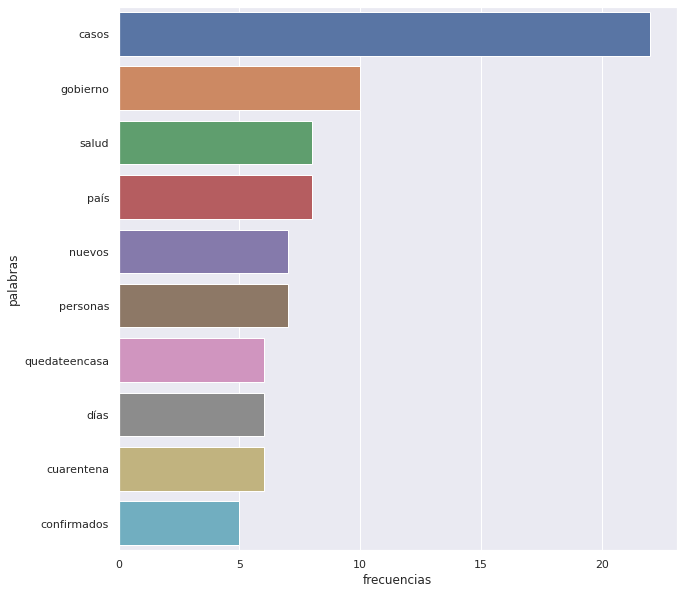

In [ ]:
random.seed(1234) #fijando la semilla
lista=texto_limpio_sw.unique().tolist()
lista2 = lista[:] 
random.shuffle(lista2)
hasta_cien=lista2[:100]
numero_palabras_cien=[len(sentence.split()) for sentence in hasta_cien]
lista_palabras_cien=[palabra for linea in hasta_cien for palabra in linea.split()]    
contador_cien_comunes=Counter(lista_palabras_cien).most_common(10)
contador_cien_comunes_df = pd.DataFrame(contador_cien_comunes)
contador_cien_comunes_df.columns = ['palabras', 'frecuencias']

palabras_cien = set()
for tweet in hasta_cien:
  palabras_cien.update(tweet)
total_cien = len(palabras_cien)
print("El numero total de palabras distintas es:",total_cien)
    
print("Cantidad de total de palabras:", sum(numero_palabras_cien))

fig, ax = pyplot.subplots(figsize = (10, 10))
ax = sns.barplot(y="palabras", x='frecuencias', ax = ax, data=contador_cien_comunes_df)


De estos 100 tweets, se puede observar que las 10 palabras más repetidas son: casos, gobierno, salud, país, nuevos, personas, quedateencasa, días, cuarentena y confirmados. 

La cantidad total de palabras dentro de éstos 100 tweets es de 1529, mientras que la cantidad de palabras únicas es de 101.

* Luego se eligieron 1000 tweets aleatorios dentro del dataset original fijando una semilla igual que para el caso anterior. 




El numero total de palabras distintas es: 315
Cantidad de total de palabras: 13857


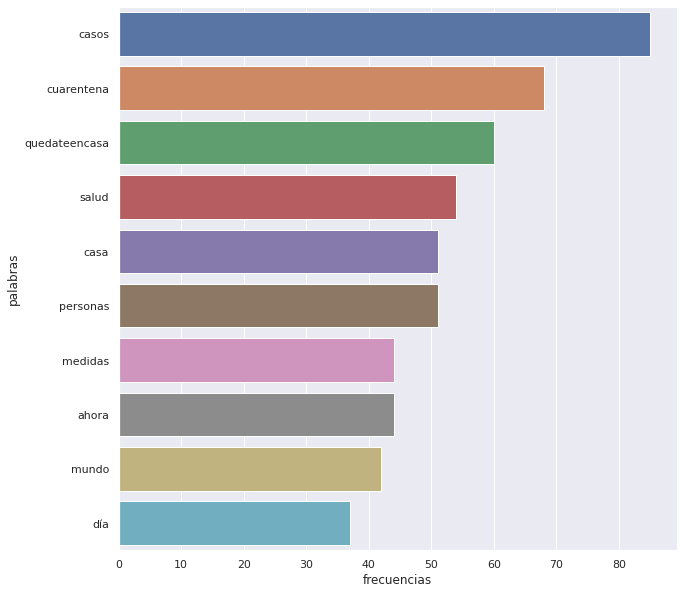

In [ ]:
random.seed(5678)
lista=texto_limpio_sw.unique().tolist()
lista3 = lista[:] 
random.shuffle(lista3)
hasta_mil=lista3[:1000]
numero_palabras_mil=[len(sentence.split()) for sentence in hasta_mil]
lista_palabras_mil=[palabra for linea in hasta_mil for palabra in linea.split()]    
contador_mil_comunes=Counter(lista_palabras_mil).most_common(10)
contador_mil_comunes_df = pd.DataFrame(contador_mil_comunes)
contador_mil_comunes_df.columns = ['palabras', 'frecuencias']

palabras_mil = set()
for tweet in hasta_mil:
  palabras_mil.update(tweet)
total_mil = len(palabras_mil)
print("El numero total de palabras distintas es:",total_mil)
    
print("Cantidad de total de palabras:", sum(numero_palabras_mil))

fig, ax = pyplot.subplots(figsize = (10, 10))
ax = sns.barplot(y="palabras", x='frecuencias', ax = ax, data=contador_mil_comunes_df)


En esta muestra la cantidad total de palabras es de 13.857, mientras que la cantidad de palabras únicas es 315.


De estos tweets, se puede observar que las 10 palabras más repetidas son casos, cuarentena, quedateencasa, salud, casa, personas, medidas, ahora, mundo y día. Se puede notar que existen muchas palabras repetidas iguales en el estudio de 100 tweets y en el estudio de 1000 tweets. Esto demuestra la importancia e influencia que ha tenido la pandemia y las medidas adoptadas en los países de habla hispana, ya que se podría deducir que el enfoque principal de los tweets es el mismo, hay una transversalidad en el dataset.


3) Siguiendo con la exploración y para empezar a entender el contenido del texto, se obtuvo un listado con las 50 palabras más frecuentemente usadas por los twiteros. Este ejercicio nos permite visualizar las temáticas más recurrentes que motivan a la gente a escribir y publicar un tweet. Además se realiza una figura descriptiva para analizar la información de manera visual.

**Gráfico 1: Frecuencia de palabras más usadas**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


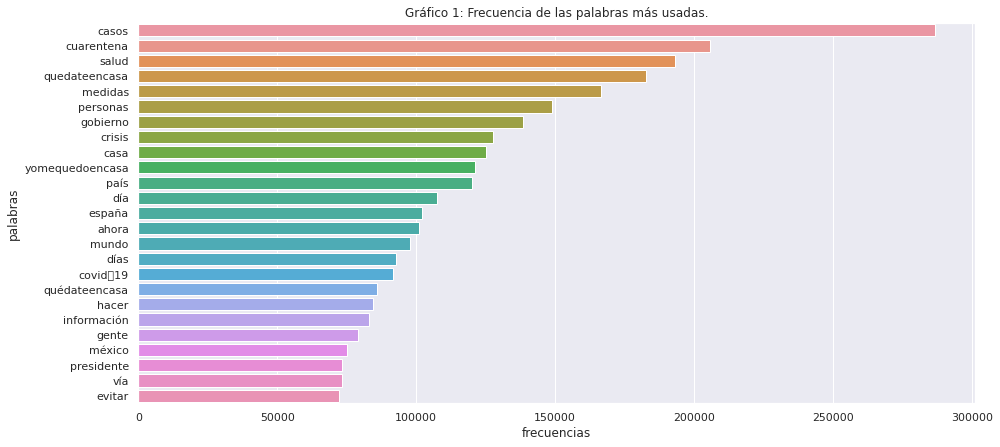

In [ ]:
#Agregar todas las palabras a una lista
lista_palabras=[palabra for linea in texto_limpio_sw for palabra in linea.split()]                              #Se agregan todas las palabras a una lista para poder graficarlas
lista_palabras[:5]

#Graficar frecuencia de palabras
sns.set(style="darkgrid")
counts = Counter(lista_palabras).most_common(25)                                                               #Top 50 de palabras más repetidas
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['palabras', 'frecuencias']

fig, ax = pyplot.subplots(figsize = (15, 7))
ax = sns.barplot(y="palabras", x='frecuencias', ax = ax, data=counts_df)
pyplot.title("Gráfico 1: Frecuencia de las palabras más usadas.")
pyplot.savefig('wordcount_bar.png')

(-0.5, 1919.5, 1079.5, -0.5)

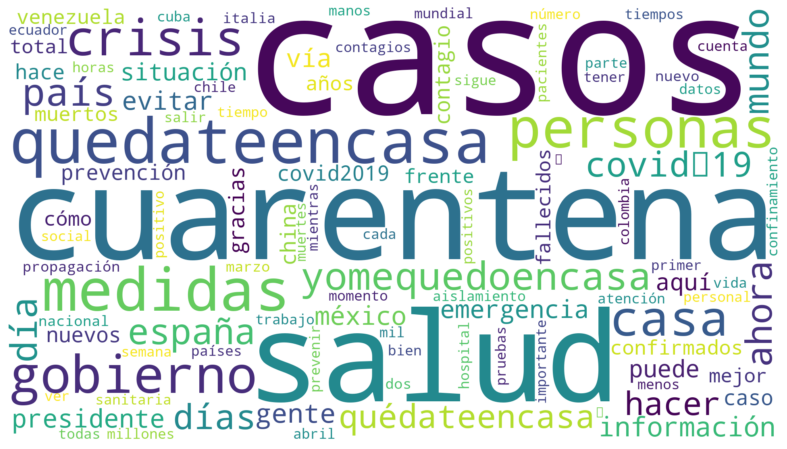

In [ ]:
#Figura descriptiva con las palabras más comunes de los tweets.
lista_palabras=[palabra for linea in texto_limpio_sw for palabra in linea.split()]  #Se agregan todas las palabras a una lista para poder graficarlas
lista_palabras[:6]
sns.set(style="darkgrid")
counts = Counter(lista_palabras).most_common()    #Top 50 de palabras más repetidas
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['palabras', 'frecuencias']


freq_dict = {}
word_freq = counts_df.values
for i in range(word_freq.shape[0]):
    freq_dict[word_freq[i, 0]] = word_freq[i, 1]

wordc = WordCloud(width=1920,
                  height=1080,
                  background_color="white",
                  max_words=100,
                  random_state = 97).generate_from_frequencies(freq_dict)
pyplot.figure(figsize=(15,8))
pyplot.imshow(wordc, interpolation='bilinear')
pyplot.axis("off")



De inmediato se puede notar que la palabra más usada es “casos” lo cual puede atribuirse a la alta cantidad de twiteros que buscan informar día a día sobre la cantidad de casos confirmados de COVID-19 en sus países, o que simplemente buscan referirse a ese dato.

Además, aparecen conceptos relacionados con el confinamiento como: cuarentena, quedateencasa, casa, y yomequedoencasa. Por otro lado, el gráfico denota que una segunda temática dominante es el manejo gubernamental de la crisis y las medidas tomadas al respecto, esta conclusión se basa en la presencia de palabras tales cómo: medidas, gobierno, crisis, país, presidente.

Las palabras encontradas tienen concordancia con la crisis mundial que se está viviendo, y en base a ellas podemos concluir que los temas más preocupantes para la población se pueden agrupar en dos: La forma en la que se vive el distanciamiento social, y las medidas tomadas por los gobiernos para combatir el avance del virus.

4) Por otra parte, para tener una primera aproximación espacial sobre la distribución de los tweets en el globo, se realizan gráficos sobre las ciudades y países con mayor cantidad de tweets.

**Gráfico 2: Ciudades con mayor cantidad de tweets**



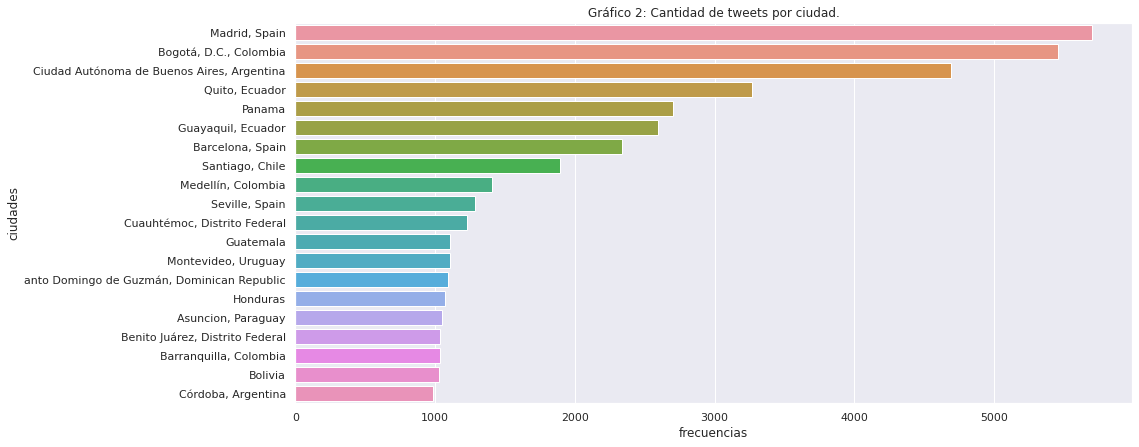

In [ ]:
ciudades=df['place_full_name']
ciudades=pd.DataFrame(ciudades)
ciudades=ciudades.dropna()
ciudades_count = ciudades.groupby(['place_full_name']).size().reset_index(name='count')
ciudades_count=ciudades_count.sort_values('count', ascending=False, inplace=False).head(20)
ciudades_count.columns = ['ciudades', 'frecuencias']
sns.set(style="darkgrid")
fig, ax = pyplot.subplots(figsize = (15, 7))
pyplot.title("Gráfico 2: Cantidad de tweets por ciudad.")
ax = sns.barplot(y="ciudades", x='frecuencias', ax = ax, data=ciudades_count)
pyplot.savefig('wordcount_bar.png')

**Gráfico 3: Países con mayor cantidad de tweets**

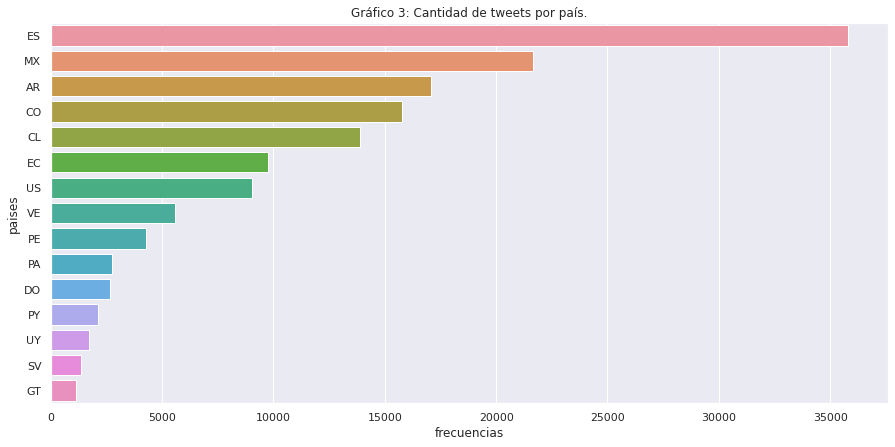

In [ ]:
paises=df['country_code']
paises=pd.DataFrame(paises)
paises=paises.dropna()
paises_count = paises.groupby(['country_code']).size().reset_index(name='count')
paises_count=paises_count.sort_values('count', ascending=False, inplace=False).head(15)
paises_count.columns = ['paises', 'frecuencias']
sns.set(style="darkgrid")
fig, ax = pyplot.subplots(figsize = (15, 7))
pyplot.title("Gráfico 3: Cantidad de tweets por país.")
ax = sns.barplot(y="paises", x='frecuencias', ax = ax, data=paises_count)
pyplot.savefig('wordcount_bar.png')


Al analizar la cantidad de tweets con los que cada ciudad de habla hispana aporta a este listado, inicialmente se puede ver que las ciudades Españolas concentran la mayor cantidad de publicaciones. Esto se puede deber a que a nivel mundial es uno de los países más afectados por ésta pandemia, no sólo en cifras de contagios sino que también en fallecidos considerando su población total, de hecho, es interesante notar que Madrid, es, en efecto, la ciudad más afectada por el virus y lidera el ranking, a pesar de que está lejos de ser la ciudad más poblada en la lista, por lo que podemos estimar un muy alto número de tweets per cápita en dicha ciudad.

Esta relación entre nivel de avance del virus y número de tweets no se mantiene a lo largo de la lista, ya que vemos urbes que no han sido especialmente afectadas como Bogotá y Buenos Aires, superando con creces el número de tweets de ciudades españolas gravemente golpeadas con contagios como Barcelona y Sevilla. A partir de ello, podemos especular acerca del nivel de preocupación que genera la situación internacional en los países que aún no sufren todo el efecto del virus. 

En relación a los datos basados en geolocalización es importante mencionar que los usuarios no siempre incuyen la ubicación al postear por lo que una cantidad no menor de filas en nuestro dataset tienen valor nulo en este atributo, adicionalmente, el nivel de precisión de la localidad puede variar y un muy buen ejemplo de esto son las ciudades de Benito Juarez DF y Cuauhtémoc DF que aparecen por separado pero realmente ambas corresponden a divisiones territoriales de la Ciudad de México. El mismo fenómeno se puede dar al revés, para ejemplificar podemos tomar el caso chileno: no sabemos si tweets localizados en Santiago de Chile corresponden realmente a ciudades cercanas como Colina o Melipilla que no corresponden realmente al Gran Santiago. En resumen, al trabajar con datos geolocalizados es importante considerar estos factores ya que hacen que el análisis quede sujeto a errores.

El tercer gráfico ordena a los diferentes paises según número de tweets y en él se observa que, en concordancía con el gráfico anterior, España es por lejos el país con mayor número de tweets, seguido de México y Argentina.

Este ranking, exceptuando el hecho de que España ocupa el primer puesto, se ajusta más al número de habitantes por país que el gráfico estudiado anteriormente, por lo que podemos analizar la homogeneidad de tweets a lo largo del territorio de cada pais, es decir, podemos encontrar paises en los que la cantidad de tweets generados en un par de grandes metrópolis aportan con la gran mayoría del total del país, mientras que por otro lado, hay países en los que una gran cantidad de localidades más pequeñas, en su suma, contribuyen de forma importante al total de tweets del país. Ejemplo claro de lo anterior salta a la luz al comparar Chile y Ecuador: Las dos mayores urbes ecuatorianas, Quito y Guayaquil, superan considerablemente a Santiago en el Gráfico 2, sin embargo, al agrupar por país notamos, en el Gráfico 3, que Chile supera en número de tweets a Ecuador, por lo que el aporte de ciudades Chilenas más pequeñas (que no alcanzan a aparecer en el ranking por ciudad) es realmente considerable, mientras que para Ecuador no lo es tanto.

En la gráfica por países resulta soprendente encontrar a Estados Unidos (US) por sobre países cuyo idioma oficial es el español como Venezuela (VZ), Perú (PE) y muchos otros. Esto se justifica por la gran cantidad de hispanohablantes en el país norteamericano, que según datos del Instituto Cervantes alcanzó en 2016 los 42,5 millones de personas que dominan el español como idioma nativo.

5) Se realiza también un análisis general de cantidad de tweets por día y hora del presente dataset, de manera de tener una primera aproximación temporal sobre los datos.

**Gráfico 4: Cantidad de tweets por día** 



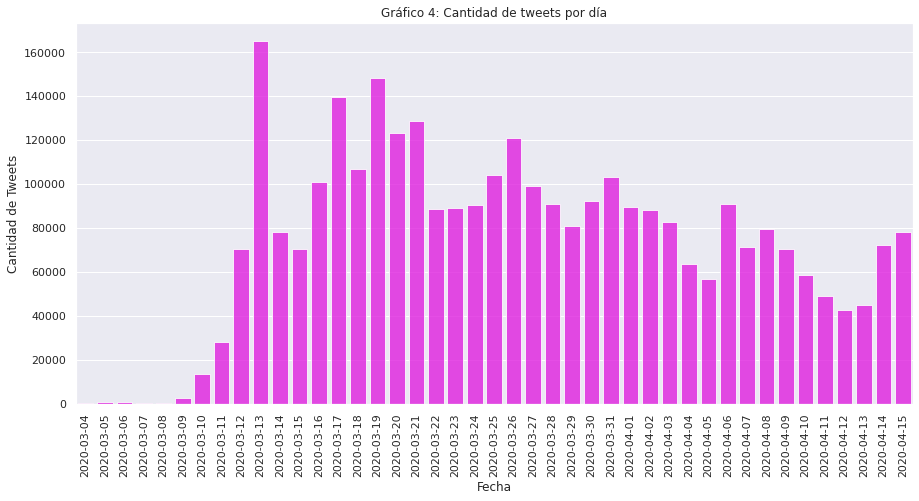

In [ ]:
#Cantidad de tweets diarios

df['created_at'] =  pd.to_datetime(df['created_at'])
cnt_srs = df['created_at'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
pyplot.figure(figsize=(15,7))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='magenta')
pyplot.xticks(rotation='vertical')
sns.set(style="darkgrid")
pyplot.xlabel('Fecha', fontsize=12)
pyplot.ylabel('Cantidad de Tweets', fontsize=12)
pyplot.title("Gráfico 4: Cantidad de tweets por día")
pyplot.show()

Analizando las fechas de los tweets, se observa que la segunda semana de marzo ve un aumento increíble en la cantidad de tweets de la mencionada naturaleza en comparación a la semana anterior, de hecho, el día viernes 13 de marzo fue el día con mayor cantidad de tweets relacionados al virus registrados (más de 160.000 sólo en español); este cambio coincide con la suspensión de clases en Chile, el decreto de cuarentena total en Argentina y en general fue durante este período que se empezaron a implementar medidas sanitarias y de aislamiento más drásticas a lo largo del continente latinoamericano, a la par que el número de contagios aumentaba. En base a ello, se puede establecer a priori una correlación entre actividad en Twitter y algunos momentos clave en el desarrollo de la enfermedad en el mundo.

Es interesante también el hecho de que a medida que la población se va acostumbrando a las medidas tomadas, el número de tweets diarios disminuye sostenidamente, quedando en evidencia una de las caracteristicas más distintivas de las redes sociales y de la información que en estas se maneja día a día, y es el hecho de que toda tendencia en ellas resulta ser efímera, en general el interés de los usuarios, que tienen fácil acceso a una cantidad inimaginable de nueva información, disminuye con el paso de tiempo y se va desviando hacia otros temas. 

Dado que cada fecha entre el 12 de marzo y 15 de abril tiene una cantidad importante de tweets, será posible analizar la predominancia de sentimientos por fecha, a modo de descubrir si existió algún cambio en relación a las emociones generales de los usuarios que se referian a la pandemia a través de su cuenta de twitter.


**Gráfico 5: Cantidad de tweets por hora**




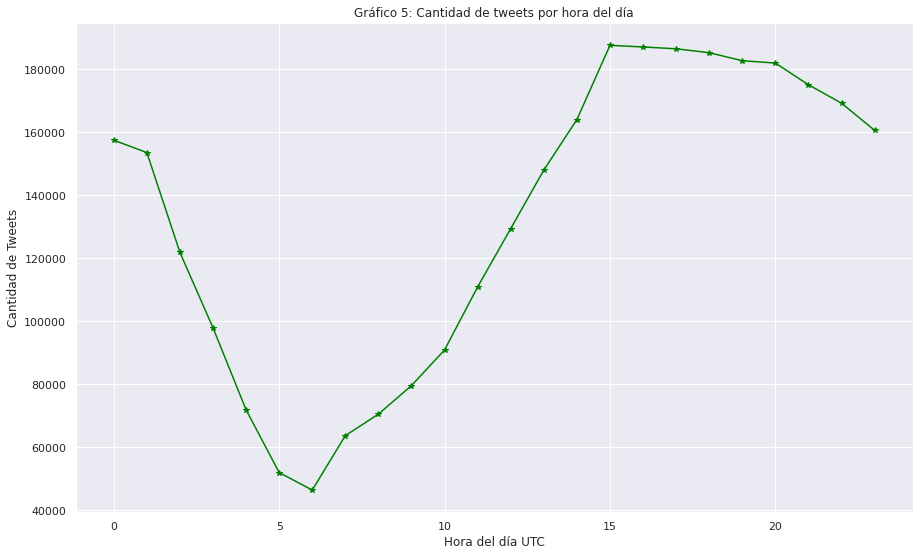

In [ ]:
#Cantidad de tweets por cada hora 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
df['created_at'] =  pd.to_datetime(df['created_at'])
hora_tweet= df['created_at'].dt.hour
cnt_ = hora_tweet.value_counts()
cnt_ = cnt_.sort_index() 
sns.set(style="darkgrid")
fig, ax = pyplot.subplots(figsize = (15, 9))
pyplot.plot(cnt_.index,cnt_.values,'*-',color="GREEN")
pyplot.xlabel('Hora del día UTC', fontsize=12)
pyplot.ylabel('Cantidad de Tweets', fontsize=12)
pyplot.title("Gráfico 5: Cantidad de tweets por hora del día")
pyplot.show()


El Gráfico 5 permite observar una clara tendencia a que la gente de habla hispana twittea en mayor cantidad desde las 15:00 UTC (11:00 am Hora Chilena). Como es de esperar el número de tweets decae en horarios nocturnos y durante las mañanas. 

Además, resulta interesante notar que la cantidad de tweets a las 3 de la mañana es igual o hasta superior que la cantidad de tweets a las 10 de la mañana,  por lo que sería interesante comparar este gráfico con uno previo a la llegada del coronavirus y las cuarentenas para analizar cómo ha afectado el encierro a los horarios de sueño de la gente. 

6) Uno de los atributos del cual entrega información el dataset es el tipo de cuenta del usuario que emite el tweet. Las clasifica entre verificadas y no verificadas. Las cuentas verificadas corresponden a usuarios más influyentes en la red, por lo que vale la pena tenerlas presentes y saber su magnitud en el dataset

**Gráfico 6: Cantidad de cuentas verificadas y no verificadas**




Text(0, 0.5, 'Cantidad de Cuentas')

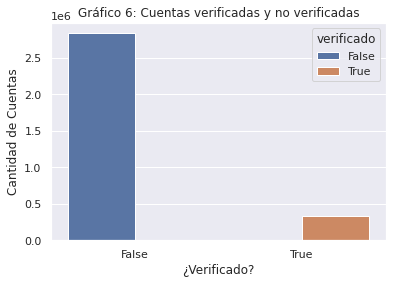

In [ ]:
#Cantidad de cuentas verificadas y cuentas comunes

verificado=df['verified']
verificado=pd.DataFrame(verificado)
verificado=verificado.dropna()
verificado_count = verificado.groupby(['verified']).size().reset_index(name='count')
verificado_count.columns = ['verificado', 'frecuencia']
sns.barplot(x='verificado', y='frecuencia', hue='verificado', data=verificado_count)
pyplot.title("Gráfico 6: Cuentas verificadas y no verificadas")
pyplot.xlabel('¿Verificado?', fontsize=12)
pyplot.ylabel('Cantidad de Cuentas', fontsize=12)


Comparando la cantidad de cuentas que twittean estando o no estando verificadas,en el Gráfico 6 se puede observar que existe un cantidad significativamente mayor de personas no verificadas en la red social compartiendo sus pensamientos.

Esta relación es esperable, debido a que no es fácil tener una cuenta verificada, ya que twitter solo entrega la verificación a cuentas oficiales de personalidades públicas y organizaciones, por lo que hay muchas menos dentro del universo total de cuentas que participan en la red social.

##**Proyecciones y desafíos futuros**

Respecto a todo el análisis exploratorio realizado y sumado a las ideas que han ido surgiendo con este, el proyecto asociado al dataset trabajado puede tener las siguientes características/puntos de desarrollo o investigación:


* Generar un análisis de sentimientos de los tweets que se han escrito en torno a la pandemia y así establecer un comportamiento de los usuarios según sus características de ubicación.

* Generar un análisis más profundo aplicando técnicas de minería de datos como clustering, de modo de establecer distintas temáticas en torno a las que se hablan en los tweets y caracterizarlas según los sentimientos a las que se asocian en los diversos países. 

* Cuando esto se encuentre realizado, se pueden agregar análisis de sentimientos según las distintas caracterizaciones que entrega el dataset, como cuentas verificadas, tweets con mayor cantidad de retweets, o cuentas con mayor cantidad de seguidores.

* Una extensión a futuro del proyecto, podría ser la comparación a nivel de sentimientos con otro dataset de tweets aleatorio (de otras fechas) posibles de extraer con python a través de la librería tweepy. Para esto el algoritmo que se elija para realizar la clasificación de sentimientos debe ser generalizable. 







**Aportes de cada integrante a la realización del Hito 1:**

 * Dataset, código, informe, voz, edición y montaje del video: Pablo

 * Código, informe y voz en video: Pia

 * Código, informe y voz en video: Matías 

 * Informe, guión y voz en video: Luca

 * Informe, guión y voz en video: Daniel

 * Ideas, análisis, correcciones y observaciones varias: Todos